In [1]:
#from google.colab import drive
import os
print(os.getcwd())

c:\Users\Windows\Desktop\Bootcamp-DS-2023-II\Clase 23 - 20 Sep 2023


# Analisis Factorial (FA)

El análisis factorial es un enfoque útil para encontrar variables latentes que no se miden directamente en una sola variable, sino que se infieren de otras variables en el conjunto de datos. Estas variables latentes se denominan factores. Entonces, el análisis factorial es un modelo de medición de variables latentes. Por ejemplo, si encontramos dos variables latentes en nuestro modelo, se llama modelo de dos factores. La suposición principal del FA es que existen tales variables latentes en nuestros datos.

En la actualidad, realizamos el análisis factorial utilizando el método de componentes principales, que es muy similar al análisis de componentes principales. Utilizaremos datos de registros nacionales de mujeres que representan a 55 países en siete eventos diferentes.

Las variables son:

- X1: 100m (s)
- X2: 200m (s)
- X3: 400m (s)
- X4: 800m (min)
- X5: 1500m (min)
- X6: 3000m (min)
- X7: Marathon (min)


In [2]:
import pandas as pd
df = pd.read_csv("women_track_records.csv")
df.head()

,COUNTRY,X1,X2,X3,X4,X5,X6,X7
0,Argentina,11.61,22.94,54.50,2.15,4.43,9.79,178.52
1,Australia,11.20,22.35,51.80,1.98,4.13,9.08,152.37
2,Austria,11.43,23.09,50.62,1.99,4.22,9.34,159.37
3,Belgium,11.41,23.04,52.00,2.00,4.14,8.88,157.85
4,Bermuda,11.46,23.05,53.30,2.16,4.58,9.81,169.98


In [3]:
df.shape

(55, 8)

In [4]:
X = df.iloc[:, 1:8]
X.head()

,X1,X2,X3,X4,X5,X6,X7
0,11.61,22.94,54.50,2.15,4.43,9.79,178.52
1,11.20,22.35,51.80,1.98,4.13,9.08,152.37
2,11.43,23.09,50.62,1.99,4.22,9.34,159.37
3,11.41,23.04,52.00,2.00,4.14,8.88,157.85
4,11.46,23.05,53.30,2.16,4.58,9.81,169.98


In [7]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled[0:5,0:5]

array([[-0.02244285, -0.56223724,  0.30020929,  0.68667744,  0.08068672],
       [-0.94259964, -1.08128697, -0.61109652, -0.89861492, -0.68007382],
       [-0.42641412, -0.43027544, -1.00937091, -0.80536243, -0.45184566],
       [-0.47129982, -0.4742627 , -0.54359238, -0.71210993, -0.65471513],
       [-0.35908558, -0.46546525, -0.10481551,  0.77992993,  0.461067  ]])

In [8]:
sc.inverse_transform(X_scaled) # si necesitas volver

array([[ 11.61,  22.94,  54.5 ,   2.15,   4.43,   9.79, 178.52],
       [ 11.2 ,  22.35,  51.8 ,   1.98,   4.13,   9.08, 152.37],
       [ 11.43,  23.09,  50.62,   1.99,   4.22,   9.34, 159.37],
       [ 11.41,  23.04,  52.  ,   2.  ,   4.14,   8.88, 157.85],
       [ 11.46,  23.05,  53.3 ,   2.16,   4.58,   9.81, 169.98],
       [ 11.31,  23.17,  52.8 ,   2.1 ,   4.49,   9.77, 168.75],
       [ 12.14,  24.47,  55.  ,   2.18,   4.45,   9.51, 191.02],
       [ 11.  ,  22.25,  50.6 ,   2.  ,   4.06,   8.81, 149.45],
       [ 12.  ,  21.52,  54.9 ,   2.05,   4.23,   9.37, 171.38],
       [ 11.95,  24.41,  54.97,   2.08,   4.33,   9.31, 168.48],
       [ 11.6 ,  24.  ,  53.26,   2.11,   4.35,   9.46, 165.42],
       [ 12.9 ,  27.1 ,  60.4 ,   2.3 ,   4.84,  11.1 , 233.22],
       [ 11.96,  24.6 ,  58.25,   2.21,   4.68,  10.43, 171.8 ],
       [ 11.09,  21.97,  47.99,   1.89,   4.14,   3.92, 158.85],
       [ 11.42,  23.52,  63.6 ,   2.03,   4.18,   8.71, 151.75],
       [ 11.79,  24.05,  

In [10]:
!pip install -q factor_analyzer


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Realicemos FA nuevamente con nfactors = 2 (anteriormente, nfactors = 4). Esto se debe a que hemos decidido mantener solo dos factores para nuestros datos

In [11]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=2, rotation="varimax", method="principal", 
                    is_corr_matrix=False)
fa.fit(X_scaled)

FactorAnalyzer(method='principal', n_factors=2, rotation='varimax',
               rotation_kwargs={})

In [12]:
fa.get_eigenvalues()[0]/7

array([0.7239424 , 0.08600366, 0.06347042, 0.05227198, 0.03847325,
       0.0198987 , 0.01593959])

In [13]:
print("Valores propios:")
print(fa.get_eigenvalues()[0]) # la suma es 7
print()
print("Communalities:")
print(fa.get_communalities())
print()
print("Varianzas especificas:")
print(fa.get_uniquenesses())
print()
print("Cargas de los factores:")
print(fa.loadings_)

Valores propios:
[5.06759677 0.6020256  0.44429295 0.36590389 0.26931274 0.13929091
 0.11157713]

Communalities:
[0.8632044  0.86854473 0.77623794 0.84827979 0.79619776 0.73826138
 0.77889637]

Varianzas especificas:
[0.1367956  0.13145527 0.22376206 0.15172021 0.20380224 0.26173862
 0.22110363]

Cargas de los factores:
[[0.8399412  0.3971186 ]
 [0.86109019 0.35646657]
 [0.81415209 0.33674071]
 [0.61543129 0.6852183 ]
 [0.22614824 0.86316553]
 [0.48965453 0.7060452 ]
 [0.46668107 0.74906952]]


**Comunalidades**

- X1: Alrededor del 86% de la variabilidad de X1 se explica por los dos factores que seleccionamos.
- X2: Alrededor del 87% de la variabilidad de X2 se explica por los dos factores que seleccionamos.
- X3: Alrededor del 78% de la variabilidad de X3 se explica por los dos factores que seleccionamos.
- X4: Alrededor del 85% de la variabilidad de X4 se explica por los dos factores que seleccionamos.
- X5: Alrededor del 80% de la variabilidad de X5 se explica por los dos factores que seleccionamos.
- X6: Alrededor del 74% de la variabilidad de X6 se explica por los dos factores que seleccionamos.
- X7: Alrededor del 78% de la variabilidad de X7 se explica por los dos factores que seleccionamos.

**variaciones específicas**

- El efecto del factor específico sobre X1 es de alrededor del 14%.
- El efecto del factor específico sobre X2 es de alrededor del 13%.
- El efecto del factor específico sobre X3 es de alrededor del 22%.
- El efecto del factor específico sobre X4 es de alrededor del 15%.
- El efecto del factor específico sobre X5 es de alrededor del 20%.
- El efecto del factor específico sobre X6 es de alrededor del 26%.
- El efecto del factor específico en X7 es de alrededor del 22%

Text(0.5, 1.0, 'Scree Plot')

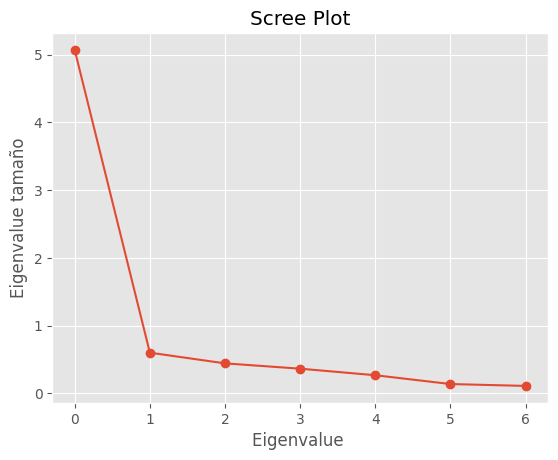

In [14]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

plt.plot(fa.get_eigenvalues()[0], marker='o')
plt.xlabel("Eigenvalue ")
plt.ylabel("Eigenvalue tamaño")
plt.title("Scree Plot")

Está claro que las **variables X1, X2, X3 definen el factor 1** (cargas altas en el factor 1, cargas relativamente pequeñas en el factor 2) mientras que las **variables X4, X5, X6 y X7 definen el factor 2** (cargas altas en el factor 2, cargas relativamente pequeñas en el factor 2). factor 1). Pero la variable X4 tiene aspectos de atributos representados por ambos factores (cargas aproximadamente iguales en ambos factores).

Para dar nombres a los dos factores, centrémonos en el dominio del conocimiento del campo.

El conjunto de datos proporcionado representa los registros nacionales de mujeres que representan a 55 países en siete eventos diferentes. Generalmente, en carreras de corta distancia (por ejemplo, 100 m, 200 m, 400 m), los atletas deben centrarse principalmente en la velocidad. En carreras de larga distancia (por ejemplo, 1500 m, 3000 m, maratón), los atletas deben centrarse principalmente en la tolerancia o la resistencia. En nuestro análisis, el **factor 1 representa los antecedentes de corta distancia (ya que X1, X2 y X3)** y el **factor 2 representa los antecedentes de larga distancia (ya que X4, X5, X6 y X7)**. Por lo tanto, podemos dar nombres relevantes para los dos factores de la siguiente manera.

- Factor 1 → factor de velocidad
- Factor 2 → tolerancia o factor de resistencia

In [15]:
transformed_df = pd.DataFrame(fa.transform(X_scaled), columns=['RF1', 'RF2'])
transformed_df.head()

,RF1,RF2
0,-0.213747,0.492749
1,-0.864122,-0.351732
2,-0.645847,-0.195162
3,-0.335540,-0.573830
4,-0.628536,0.822508


# Analisis Discriminante

In [16]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = load_iris()
X = iris.data
y = iris.target
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [17]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled[0:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [19]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

lda = LinearDiscriminantAnalysis(n_components=2, solver='svd')
X_lda = lda.fit_transform(X, y)

Text(0, 0.5, 'LD2')

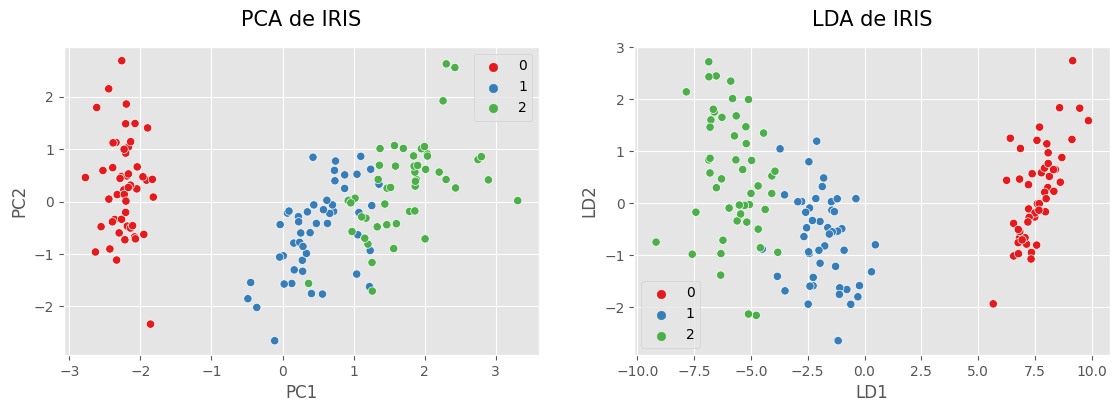

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13.5 ,4))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='Set1', ax=ax[0])
sns.scatterplot(x=X_lda[:,0], y=X_lda[:,1], hue=y, palette='Set1', ax=ax[1])
ax[0].set_title("PCA de IRIS", fontsize=15, pad=15)
ax[1].set_title("LDA de IRIS", fontsize=15, pad=15)
ax[0].set_xlabel("PC1", fontsize=12)
ax[0].set_ylabel("PC2", fontsize=12)
ax[1].set_xlabel("LD1", fontsize=12)
ax[1].set_ylabel("LD2", fontsize=12)

# Kernel PCA

<Axes: >

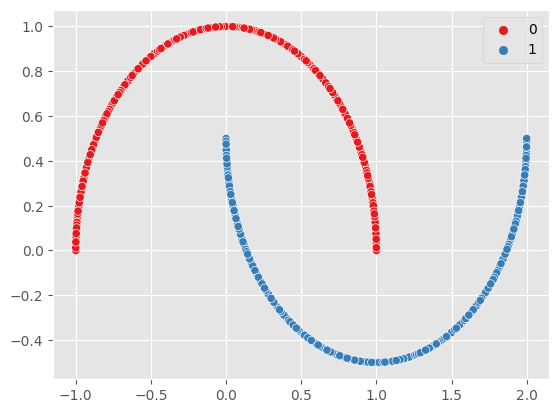

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Creamos los datos
X, y = make_moons(n_samples = 500, random_state=42)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='Set1')

Implementemos PCA y Kernel PCA y veamos las diferencias

In [22]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15, random_state=42)
X_kpca = kpca.fit_transform(X)

Text(0, 0.5, 'Componente 2')

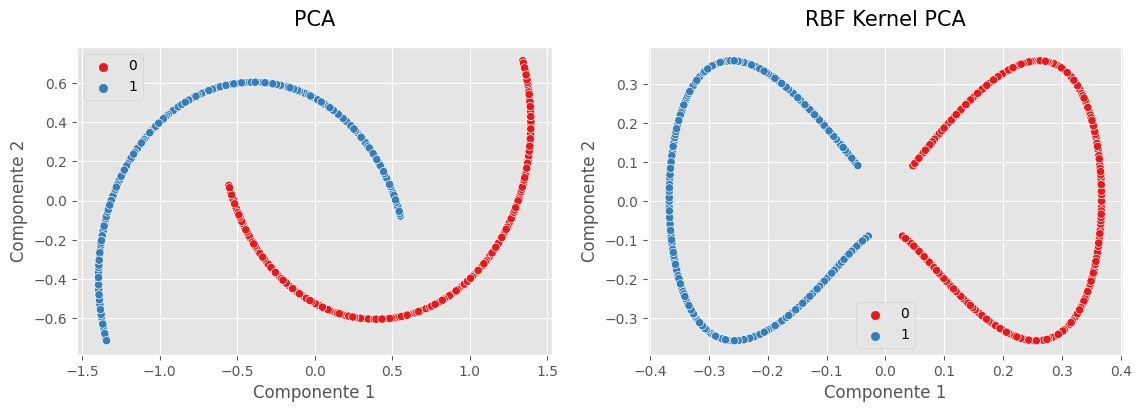

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13.5 ,4))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1', ax=ax[0])
sns.scatterplot(x=X_kpca[:, 0], y=X_kpca[:, 1], hue=y, palette='Set1', ax=ax[1])
ax[0].set_title("PCA", fontsize=15, pad=15)
ax[1].set_title("RBF Kernel PCA", fontsize=15, pad=15)
ax[0].set_xlabel("Componente 1", fontsize=12)
ax[0].set_ylabel("Componente 2", fontsize=12)
ax[1].set_xlabel("Componente 1", fontsize=12)
ax[1].set_ylabel("Componente 2", fontsize=12)

El PCA normal no puede transformar datos no lineales en una forma lineal. Después de aplicar Kernel PCA a los mismos datos, las dos clases están linealmente bien separadas (ahora, las clases se pueden dividir dibujando una línea recta vertical).

Aquí, los datos originales tienen una dimensión de 2 y los datos trazados también tienen una dimensión de 2. Entonces, el **Kernel PCA realmente redujo la dimensionalidad de los datos?** La respuesta es 'Sí' porque la función kernel RBF proyecta temporalmente los datos bidimensionales en un nuevo espacio de características de dimensiones superiores donde las clases se vuelven linealmente separables y luego el algoritmo proyecta esos datos de dimensiones superiores nuevamente en los datos bidimensionales que se puede trazar en un gráfico 2D. 

**Una limitación del uso de Kernel PCA para la reducción de dimensionalidad es que tenemos que especificar un valor para el hiperparámetro gamma antes de ejecutar el algoritmo** y para esto e puede usar una técnica de ajuste de hiperparámetros como Grid Search para encontrar un valor óptimo para la gamma. 

# t-SNE

In [24]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
tsne = TSNE()
X_tsne = tsne.fit_transform(X_pca)

Ahora creamos un pipeline

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
pca = PCA()
tsne = TSNE()
tsne_after_pca = Pipeline([
    ('std_scaler', sc),
    ('pca', pca),
    ('tsne', tsne)
])
X_tsne = tsne_after_pca.fit_transform(X)

Ahora, aplicamos t-SNE al conjunto de datos Iris. Tiene solo 4 características. Por lo tanto, no necesitamos ejecutar PCA antes de t-SNE

Text(0.5, 1.0, 't-SNE de IRIS')

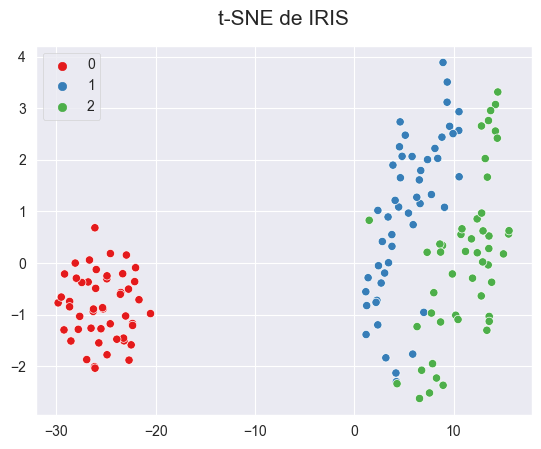

In [26]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
sns.set_style('darkgrid')

iris = load_iris()
X = iris.data
y = iris.target

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

tsne = TSNE(n_components=2, random_state=1)
X_tsne = tsne.fit_transform(X_scaled)

sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y, palette='Set1')
plt.title("t-SNE de IRIS", fontsize=15, pad=15)

# Multidimensional Scaling

In [27]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import MDS
sns.set_style('darkgrid')

iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
MDS?

Text(0.5, 1.0, 'MDS de IRIS dataset')

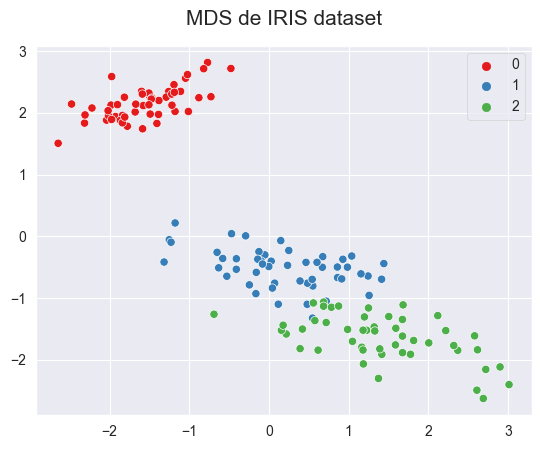

In [28]:
mds = MDS(n_components=2, metric=True, random_state=2)
X_mds = mds.fit_transform(X)

sns.scatterplot(x=X_mds[:,0], y=X_mds[:,1], hue=y, palette='Set1')
plt.title("MDS de IRIS dataset", fontsize=15, pad=15)

# Isomap

In [29]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import Isomap
sns.set_style('darkgrid')

iris = load_iris()
X = iris.data
y = iris.target

Text(0.5, 1.0, 'Isomap de IRIS')

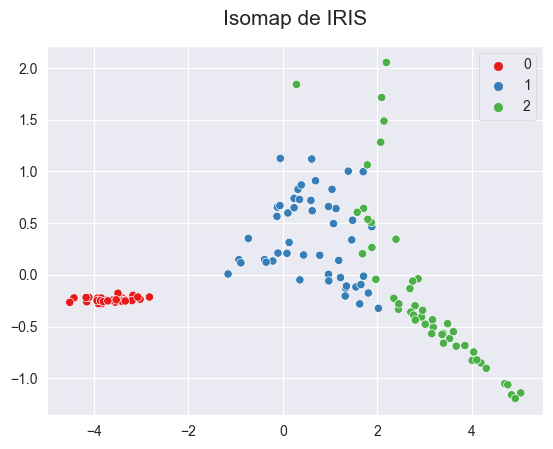

In [30]:
isomap = Isomap(n_neighbors=5, n_components=2, 
                eigen_solver='auto')
X_isomap = isomap.fit_transform(X)

sns.scatterplot(x=X_isomap[:,0], y=X_isomap[:,1], hue=y, palette='Set1')
plt.title("Isomap de IRIS", fontsize=15, pad=15)